In [1]:
import matplotlib.pyplot  as plt
import numpy as np
import pandas as pd
import sqlite3


#Creation of SQL Database
conn = sqlite3.connect('bitcoin_price_comparison.db')
cursor = conn.cursor()

#Fetch of bitcoin data and conversion to SQL
bitcoin_prices = pd.read_csv('bitcoin_price_history.csv')
bitcoin_prices.to_sql('bitcoin_prices', conn, if_exists='replace')

#SQL Query that shows Difference in Price and accompanying Volume
pd.read_sql_query("""
    SELECT Date, High - Low AS 'Difference', Volume FROM bitcoin_prices 
    WHERE Volume <> '-'
    ORDER BY 
        CAST (Volume AS NUMERIC(18,0))
        ASC LIMIT 8;
""", conn)

/Users/danielcarter/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


,Date,Difference,Volume
0,30-Oct-17,174.14,"1,772,150,000"
1,28-Oct-17,187.53,"1,403,920,000"
2,27-Oct-17,259.57,"1,710,130,000"
3,26-Oct-17,255.58,"1,905,040,000"
4,25-Oct-17,356.45,"1,966,990,000"
5,19-Oct-17,213.29,"1,780,540,000"
6,17-Oct-17,327.63,"1,821,570,000"
7,15-Oct-17,373.87,"1,976,040,000"


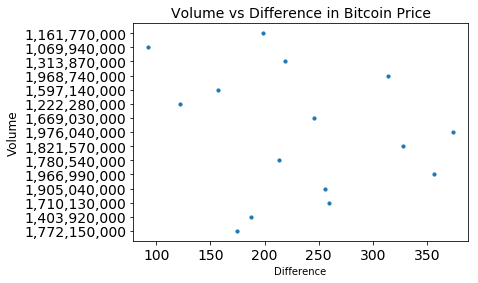

In [2]:
# Function that takes the SQL Query and converts data into a scatterplot. 
# NOTE: I chose a sample of 15 to make the plot easier to read. 
# ALSO NOTE: The volume data did not display correctly. 

def sql_select_all():
    conn = sqlite3.connect('crypto_price_comparisons.db')
    cursor = conn.cursor()
    
    bitcoin_prices = pd.read_csv('bitcoin_price_history.csv')
    bitcoin_prices.to_sql('bitcoin_prices', conn, if_exists='replace')
    
    sql = """
    SELECT 
            High - Low AS 'Difference', 
            Volume 
        FROM bitcoin_prices 
        WHERE Volume <> '-' 
        ORDER BY CAST (Volume AS NUMERIC(18, 0)) ASC LIMIT 15;
    """
    cursor.execute(sql)
    rows = cursor.fetchall()
    df = pd.DataFrame(list(rows),columns=["difference","volume"])
    x = df.difference
    y = df.volume
    df.sort_values(by="volume", ascending=False)
    plt.title("Volume vs Difference in Bitcoin Price", fontsize="14")
    plt.scatter(x, y, s=10)
    plt.xlabel("Difference")
    plt.ylabel("Volume", fontsize="12")
    plt.tick_params(axis='both',which='major',labelsize=14)
    cursor.close()

sql_select_all()


# Conclusion

#### In spite of the errors and difficulties in getting my data to display correctly, it appears that there is a limited or very weak correlation at best between the price difference in bitcoin currency and the volume of transactions.